# Initial Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv("./kieranFeatures_1-30_26-Sep-2024.csv")
df.head()

,ID,EDA_TonicMean_version02,EDA_TonicMean_version03,EDA_TonicMean_version04,EDA_TonicMean_version05,EDA_TonicMean_version09,EDA_TonicMean_version10,EDA_TonicMean_version11,EDA_TonicMean_version12,EDA_TonicMean_version16,...,EEG_avgRelTheta_version16,EEG_avgRelTheta_version17,EEG_avgRelTheta_version19,EEG_avgRelTheta_version20,EEG_avgRelTheta_version22,EEG_avgRelTheta_version23,adjSA1,adjSA2,adjSA3,adjSAtotal
0,5,-0.123031,-0.226077,-1.220480,-1.697738,-0.273200,-0.601171,-0.809518,-1.012558,-0.299118,...,-1.877017,-1.442056,1.070298,1.277417,0.249605,0.400156,0.119790,1.593122,-0.800726,0.350233
1,5,-0.152896,-0.050866,1.527067,1.883468,-0.378060,-0.018812,1.023216,1.189124,-0.355315,...,-1.632698,-1.531970,1.779032,1.074498,0.409991,0.333842,0.075246,-1.663383,0.859309,-0.262893
2,5,-0.166035,-0.181478,1.634437,0.904620,-0.424192,-0.452936,1.123414,0.534554,-0.380039,...,-1.489450,-1.448590,2.194570,1.262672,0.504028,0.395338,-1.072729,0.879836,-1.542415,-0.938513
3,5,-0.231095,-0.209571,1.654951,1.247081,-0.652624,-0.546311,1.214370,0.821624,-0.502463,...,-1.353433,-1.059878,2.589134,2.139926,0.593317,0.682023,-0.643181,-0.217332,0.945816,0.145041
4,5,-0.236090,-0.323013,-0.478244,-1.080788,-0.670161,-0.923364,-0.421866,-0.775114,-0.511862,...,-1.443846,-0.627980,2.326862,3.114644,0.533965,1.000560,-0.323098,0.712401,-1.473404,-0.642872


# Pre-Processing

Divide up dataframe into predictors and outcomes. Train-test-split the following data.

In [7]:
# Create binary variables for high and low 
adj_SA_1_median = np.median(df["adjSA1"])
adj_SA_2_median = np.median(df["adjSA2"])
adj_SA_3_median = np.median(df["adjSA3"])
adj_SA_tot_median = np.median(df["adjSAtotal"])

# Will be high if adjusted SA level score is equal to or above median, low otherwise
df["Lv_1_Hi"] = (df["adjSA1"] >= adj_SA_1_median).astype(int)
df["Lv_2_Hi"] = (df["adjSA2"] >= adj_SA_2_median).astype(int)
df["Lv_3_Hi"] = (df["adjSA3"] >= adj_SA_3_median).astype(int)
df["Tot_Hi"] = (df["adjSAtotal"] >= adj_SA_tot_median).astype(int)

In [8]:
predictors_df = df.iloc[:, 1:(df.shape[1] - 8)]
outcomes_df = df.iloc[:, (df.shape[1] - 8):]

# Split into train and test
predictors_train, predictors_test, outcomes_train, outcomes_test = train_test_split(predictors_df, outcomes_df, test_size = 0.2, random_state = 42)

# Scale the data
scaler = StandardScaler()
predictors_train = scaler.fit_transform(predictors_train)
predictors_train = pd.DataFrame(predictors_train, columns = predictors_df.columns)
predictors_test = scaler.transform(predictors_test)
predictors_test = pd.DataFrame(predictors_test, columns = predictors_df.columns)

# Get separate DataFrame with different amount of selected features
predictors_train_5000 = predictors_train.sample(axis = "columns", n = 5000, random_state = 42, replace = False)
predictors_test_5000 = predictors_test.sample(axis = "columns", n = 5000, random_state = 42, replace = False)

# predictors_train_1000 = predictors_train.sample(axis = "columns", n = 1000, random_state = 42, replace = False)
# predictors_test_1000 = predictors_test.sample(axis = "columns", n = 1000, random_state = 42, replace = False)

# predictors_train_500 = predictors_train.sample(axis = "columns", n = 500, random_state = 42, replace = False)
# predictors_test_500 = predictors_test.sample(axis = "columns", n = 500, random_state = 42, replace = False)

predictors_train_100 = predictors_train.sample(axis = "columns", n = 100, random_state = 42, replace = False)
predictors_test_100 = predictors_test.sample(axis = "columns", n = 100, random_state = 42, replace = False)

# Free up memory
del df
del predictors_df
del outcomes_df

,EDA_TonicMean_version02,EDA_TonicMean_version03,EDA_TonicMean_version04,EDA_TonicMean_version05,EDA_TonicMean_version09,EDA_TonicMean_version10,EDA_TonicMean_version11,EDA_TonicMean_version12,EDA_TonicMean_version16,EDA_TonicMean_version17,...,EEG_avgRelTheta_version09,EEG_avgRelTheta_version10,EEG_avgRelTheta_version11,EEG_avgRelTheta_version12,EEG_avgRelTheta_version16,EEG_avgRelTheta_version17,EEG_avgRelTheta_version19,EEG_avgRelTheta_version20,EEG_avgRelTheta_version22,EEG_avgRelTheta_version23
0,-0.123031,-0.226077,-1.220480,-1.697738,-0.273200,-0.601171,-0.809518,-1.012558,-0.299118,-0.469374,...,-2.470055,-1.633813,-1.521523,-1.189742,-1.877017,-1.442056,1.070298,1.277417,0.249605,0.400156
1,-0.152896,-0.050866,1.527067,1.883468,-0.378060,-0.018812,1.023216,1.189124,-0.355315,-0.160570,...,-1.999027,-1.796969,-0.890211,-0.846923,-1.632698,-1.531970,1.779032,1.074498,0.409991,0.333842
2,-0.166035,-0.181478,1.634437,0.904620,-0.424192,-0.452936,1.123414,0.534554,-0.380039,-0.390771,...,-1.722859,-1.645669,-0.543299,-0.588502,-1.489450,-1.448590,2.194570,1.262672,0.504028,0.395338
3,-0.231095,-0.209571,1.654951,1.247081,-0.652624,-0.546311,1.214370,0.821624,-0.502463,-0.440284,...,-1.460630,-0.940319,-0.955926,-0.744128,-1.353433,-1.059878,2.589134,2.139926,0.593317,0.682023
4,-0.236090,-0.323013,-0.478244,-1.080788,-0.670161,-0.923364,-0.421866,-0.775114,-0.511862,-0.640221,...,-1.634937,-0.156605,-0.344389,0.214848,-1.443846,-0.627980,2.326862,3.114644,0.533965,1.000560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.390463,-0.392143,-0.150550,-0.112208,-0.248912,-0.241573,-0.239724,-0.191818,-0.336535,-0.330997,...,-0.046622,-0.464843,0.523703,0.110708,0.163210,-0.308442,0.105745,-0.391989,0.798338,-0.432294
300,-0.369596,-0.380586,-0.609280,-0.487820,-0.175647,-0.203160,-0.582746,-0.450147,-0.286580,-0.305082,...,-0.102853,-0.200243,0.539456,0.390624,0.101655,-0.000704,0.021136,-0.062902,0.571962,0.092100
301,-0.457362,-0.382835,-1.247644,-0.132967,-0.483803,-0.210636,-1.131586,-0.204537,-0.496694,-0.310125,...,0.160880,-0.095837,2.240786,1.697116,0.390354,0.120724,0.417964,0.066950,1.633695,0.299016
302,-0.370669,-0.390531,-1.078873,-0.866528,-0.179415,-0.236215,-0.917973,-0.699119,-0.289149,-0.327382,...,-0.394919,-0.514674,-0.292277,-0.368327,-0.218058,-0.366396,-0.418322,-0.453964,-0.603831,-0.531050


,adjSA1,adjSA2,adjSA3,adjSAtotal,Lv_1_Hi,Lv_2_Hi,Lv_3_Hi,Tot_Hi
0,0.119790,1.593122,-0.800726,0.350233,1,1,0,1
1,0.075246,-1.663383,0.859309,-0.262893,0,0,1,0
2,-1.072729,0.879836,-1.542415,-0.938513,0,1,0,0
3,-0.643181,-0.217332,0.945816,0.145041,0,0,1,0
4,-0.323098,0.712401,-1.473404,-0.642872,0,1,0,0
...,...,...,...,...,...,...,...,...
299,0.076099,1.105227,-0.609431,0.209332,0,1,0,1
300,-0.258249,-0.360422,0.778641,0.155357,0,0,1,1
301,0.110240,0.092504,0.945232,0.627581,1,1,1,1
302,-1.105639,0.426616,0.328063,-0.108335,0,1,1,0


# Training Models

In [9]:
def select_hyperparameters(model, predictors, outcome, params, eval_metric):
    """
        Conducts 5-Fold GridSearchCV on a Logistic Regression model to identify suitable hyperparameters

        Parameters:
            model (sklearn Model): sklearn Model to conduct GridSearchCV on
            predictors (Dataframe): pandas Dataframe containing all predictor features
            outcome (Series): pandas Series containing all values for the outcome variable
            params (dictionary): Dictionary of parameters for GridSearchCV for a LogisticRegression model
            eval_metric (string): Name of evaluation metric to use for GridSearchCV

        Return:
            clf (GridSearchCV): GridSearchCV object after running GridSearchCV with provided parameters
    """
    
    # Perform 5-fold cross-validation with different regularization strengths and regularization types
    clf = GridSearchCV(model, params, cv = 5, scoring = eval_metric, n_jobs = -1)
    clf.fit(predictors, outcome)

    # Show the best regularization strength and penaalty type
    print("Best regularization strength:", clf.best_params_["C"])
    print("Best l1_ratio:", clf.best_params_["l1_ratio"])

    return clf

In [11]:
params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": [0, 0.1, 0.5, 0.9, 1]
}

# C = 1, l1_ratio = 0.1
# print("5000 Features SA 1:")
# SA_1_LogReg_5000 = LogisticRegression(solver = "saga", penalty = "elasticnet", max_iter = 10000, fit_intercept = False, n_jobs = 1)
# SA_1_LogReg_5000_GridSearchCV = select_hyperparameters(SA_1_LogReg_5000, predictors_train, outcomes_train["Lv_1_Hi"], params, "accuracy")
# print("")

# C = 0.1 l1_ratio = 0.1
# print("5000 Feature SA 2:")
# SA_2_LogReg_5000 = LogisticRegression(solver = "saga", penalty = "elasticnet", max_iter = 10000, fit_intercept = False, n_jobs = 1)
# SA_2_LogReg_5000_GridSearchCV = select_hyperparameters(SA_2_LogReg_5000, predictors_train, outcomes_train["Lv_2_Hi"], params, "accuracy")
# print("")

# C = 0.001, l1_ratio = 0
# print("5000 Features SA 3:")
# SA_3_LogReg_5000 = LogisticRegression(solver = "saga", penalty = "elasticnet", max_iter = 10000, fit_intercept = False, n_jobs = 1)
# SA_3_LogReg_5000_GridSearchCV = select_hyperparameters(SA_3_LogReg_5000, predictors_train, outcomes_train["Lv_3_Hi"], params, "accuracy")
# print("")

print("5000 Features Total SA:")
SA_tot_LogReg_5000 = LogisticRegression(solver = "saga", penalty = "elasticnet", max_iter = 10000, fit_intercept = False, n_jobs = 1)
SA_tot_LogReg_5000_GridSearchCV = select_hyperparameters(SA_tot_LogReg_5000, predictors_train, outcomes_train["Tot_Hi"], params, "accuracy")
print("")

print("100 Features SA 1:")
SA_1_LogReg_100 = LogisticRegression(solver = "saga", penalty = "elasticnet", max_iter = 10000, fit_intercept = False, n_jobs = 1)
SA_1_LogReg_100_GridSearchCV = select_hyperparameters(SA_1_LogReg_100, predictors_train, outcomes_train["Lv_1_Hi"], params, "accuracy")
print("")

print("100 Feature SA 2:")
SA_2_LogReg_100 = LogisticRegression(solver = "saga", penalty = "elasticnet", max_iter = 10000, fit_intercept = False, n_jobs = 1)
SA_2_LogReg_100_GridSearchCV = select_hyperparameters(SA_2_LogReg_100, predictors_train, outcomes_train["Lv_2_Hi"], params, "accuracy")
print("")

print("100 Features SA 3:")
SA_3_LogReg_100 = LogisticRegression(solver = "saga", penalty = "elasticnet", max_iter = 10000, fit_intercept = False, n_jobs = 1)
SA_3_LogReg_100_GridSearchCV = select_hyperparameters(SA_3_LogReg_100, predictors_train, outcomes_train["Lv_3_Hi"], params, "accuracy")
print("")

print("100 Features Total SA:")
SA_tot_LogReg_100 = LogisticRegression(solver = "saga", penalty = "elasticnet", max_iter = 10000, fit_intercept = False, n_jobs = 1)
SA_tot_LogReg_100_GridSearchCV = select_hyperparameters(SA_tot_LogReg_100, predictors_train, outcomes_train["Tot_Hi"], params, "accuracy")

5000 Features SA 1:


Best regularization strength: 1
Best l1_ratio: 0.1

5000 Feature SA 2:
Best regularization strength: 0.1
Best l1_ratio: 0.1

5000 Features SA 3:
Best regularization strength: 0.001
Best l1_ratio: 0

5000 Features Total SA:


KeyboardInterrupt: 

In [18]:
SA_1_LogReg_5000 = LogisticRegression(max_iter = 10000, fit_intercept = False, n_jobs = -1)
SA_1_LogReg_5000.fit(predictors_train_5000, outcomes_train["Lv_1_Hi"])

SA_2_LogReg_5000 = LogisticRegression(max_iter = 10000, fit_intercept = False, n_jobs = -1)
SA_2_LogReg_5000.fit(predictors_train_5000, outcomes_train["Lv_2_Hi"])

SA_3_LogReg_5000 = LogisticRegression(max_iter = 10000, fit_intercept = False, n_jobs = -1)
SA_3_LogReg_5000.fit(predictors_train_5000, outcomes_train["Lv_3_Hi"])

SA_tot_LogReg_5000 = LogisticRegression(max_iter = 10000, fit_intercept = False, n_jobs = -1)
SA_tot_LogReg_5000.fit(predictors_train_5000, outcomes_train["Tot_Hi"])

SA_1_LogReg_100 = LogisticRegression(max_iter = 10000, fit_intercept = False, n_jobs = -1)
SA_1_LogReg_100.fit(predictors_train_100, outcomes_train["Lv_1_Hi"])

SA_2_LogReg_100 = LogisticRegression(max_iter = 10000, fit_intercept = False, n_jobs = -1)
SA_2_LogReg_100.fit(predictors_train_100, outcomes_train["Lv_2_Hi"])

SA_3_LogReg_100 = LogisticRegression(max_iter = 10000, fit_intercept = False, n_jobs = -1)
SA_3_LogReg_100.fit(predictors_train_100, outcomes_train["Lv_3_Hi"])

SA_tot_LogReg_100 = LogisticRegression(max_iter = 10000, fit_intercept = False, n_jobs = -1)
SA_1_LogReg_100.fit(predictors_train_100, outcomes_train["Tot_Hi"])

LogisticRegression(fit_intercept=False, max_iter=10000, n_jobs=-1)

# Evaluating Model Performance (Accuracy)

In [19]:
def get_eval_metrics(model, predictors, outcome):
    """
        Plots confusion matrix and ROC-AUC curve for a fitted sklearn model

        Parameters:
            model (sklearn Model): sklearn model to predict outcome values
            predictors (DataFrame): pandas Dataframe containing all predictor features
            outcome (Series): pandas Series containing all values for the outcome variable
            display_labels (list(str)): List of 2 strings for labeling the 0 and 1 outputs for confusion matrix

        Return:
            None
    """
    
    predicted_outcomes = model.predict(predictors)
    print("Accuracy: ", accuracy_score(predicted_outcomes, outcome))

    # Confusion Matrix
    cm = metrics.confusion_matrix(outcome, predicted_outcomes)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = metrics.roc_curve(outcome, predicted_outcomes)
    roc_auc  = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label = "ROC Curve (area = %0.3f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "k--") # Random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

Accuracy:  0.5081967213114754


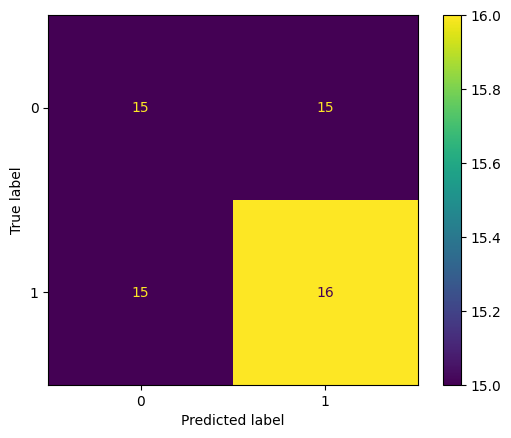

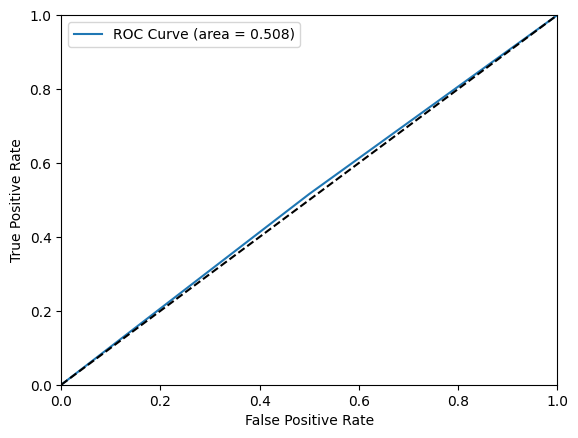

In [20]:
get_eval_metrics(SA_1_LogReg_5000, predictors_test_5000, outcomes_test["Lv_1_Hi"])

Accuracy:  0.5245901639344263


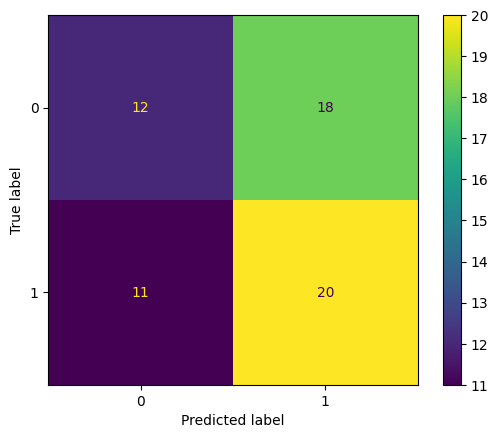

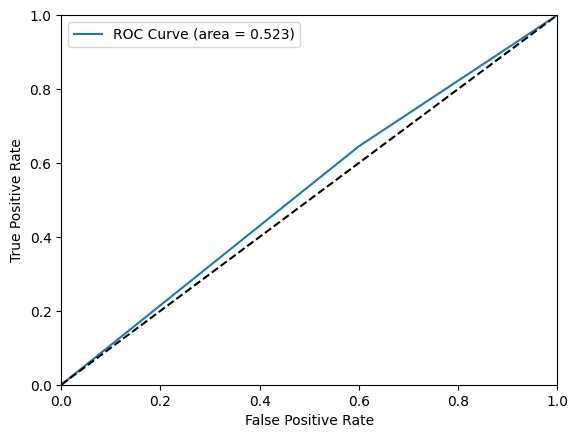

In [24]:
get_eval_metrics(SA_2_LogReg_5000, predictors_test_5000, outcomes_test["Tot_Hi"])